In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import import_ipynb
from Project_Proposal import summer_events, winter_events

## Summary of the different descriptive statistics

I begin the analysis by checking for the differences between two sexes.  


In [5]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        COUNT(*),            
                        COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM summer_events
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     59443  26.709713
1   M    163109  73.290287


In [9]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                    COUNT(*),            
                    COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM winter_events
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     15079  31.049749
1   M     33485  68.950251


Men happen to dominate both of the Olympics, although ratios do differ between them. My first hypothesis was that female to male ratio has increased through time. We will look into that in no time.

In [10]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM summer_events
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  23.660997   168.169025    60.087644
1   M  26.443944   178.901874    75.604195


In [11]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM winter_events
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  24.014398   166.528250    59.755156
1   M  25.504261   178.668699    76.357058


There are clear differences between male and female participants in terms of not only height and weight, which was expected, but also in terms of age. The first two differences can be attributed to biology. While the latter may demand more than just that: it is worth looking into social factors as well.  
Another interesting fact is, the age gap is considerably less in Winter Olympics (~2.8 years vs. ~1.5 years)
  
Another analysis needs to be done on medal counts and ratios. I checked for changes in ratio of total medal winners, as well as ratios of different medals:

In [12]:
#Summer Olympics:
summer_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

In [13]:
#Winter Olympics:
winter_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

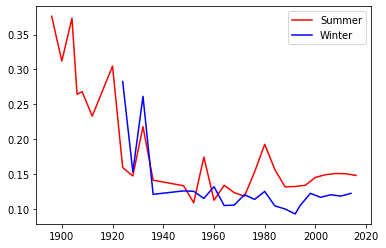

In [14]:
plt.plot(summer_medals.Year, summer_medals.medal_ratio, color = "red", label = "Summer")
plt.plot(winter_medals.Year, winter_medals.medal_ratio, color = "blue", label = "Winter")
plt.legend()

In the last century, in both competition, medal ratio has fluctuated widely, but ended up stabilized. This might be explained establishment of norms in these matters.

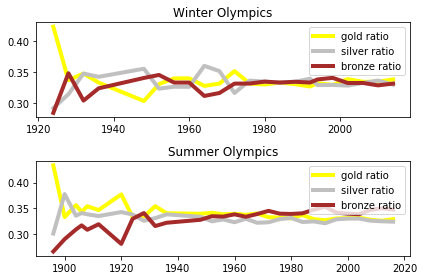

In [36]:
fig, ax = plt.subplots(2)
ax[0].plot(winter_medals.Year, winter_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[0].plot(winter_medals.Year, winter_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[0].plot(winter_medals.Year, winter_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
ax[0].legend(loc=1)
ax[0].set_title("Winter Olympics")
ax[1].plot(summer_medals.Year, summer_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[1].plot(summer_medals.Year, summer_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[1].plot(summer_medals.Year, summer_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
plt.legend(loc=1)
ax[1].set_title("Summer Olympics")
plt.tight_layout()

Relative percentages of gold, silver, and bronze medals has stabilized as well, probably due to the above-mentioned reason.

## Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review?  

1. I realized there are important differences in two Olympiads (summer and winter) in terms of the number of participants, etc., so they have to be analysed separately.  
2. I discovered the percentage of participants winning medals, as well as medal ratios (gold:silver:broze), has stabilized in recent Olympiads.    
3. I noticed that the age gap between male and female participants of Winter Olympics is smaller compared to Summer Olympics.  

## Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?  

My first hypothesis was that the female to male ratio has increased through time. I will create a table of F:M ratio through years and then draw a histogram to see the relationship.

In [38]:
m_f_ratio_summer = pysqldf('''SELECT 
                        Year,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM summer_events
                     GROUP BY Year
                    ''')

m_f_ratio_winter = pysqldf('''SELECT 
                        Year,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM winter_events
                     GROUP BY Year
                    ''')

Text(0, 0.5, 'F/M')

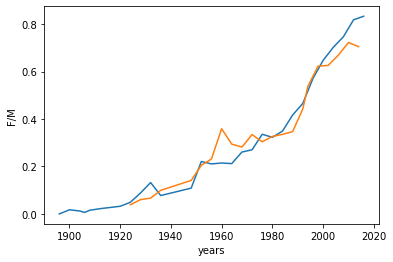

In [40]:
plt.plot(m_f_ratio_summer.Year, m_f_ratio_summer.Ratio)
plt.plot(m_f_ratio_winter.Year, m_f_ratio_winter.Ratio)
plt.xlabel("years")
plt.ylabel("F/M")

The hypothesis appears to be true. Female to male ratio has indeed increased through time. There is, however, an interesting detail: around the WW2, ratio in Summer Olympics has decreased steeply, only to regain momentum later. I am unable to explain this phenomenon without further analysis.

## Additional questions I am seeking to answer?
I will test my next two hypotheses with help of A/B testing. These hypotheses are:  
H2: Country performance by year varies more in Winter Olympics.  
H3: Performance of a country in winter olympics correlates with its performance in summer olympics.